In [2]:
import torch
torch.Tensor([[   1, -2.0059,  0.4063,  1.0195,     1]])[:, 1:-1].reshape(-1, 1)

tensor([[-2.0059],
        [ 0.4063],
        [ 1.0195]])

In [4]:
t=torch.Tensor([[-2.0036,  0.8905, -0.5095],
        [-2.0036,  0.8905, -0.5095],
        [-2.0036,  0.8905, -0.5095],
        [-2.0036,  0.8905, -0.5095],
        [-2.0036,  0.8905, -0.5095],
        [-2.0036,  0.8905, -0.5095],
        [-2.0036,  0.8905, -0.5095],
        [-2.0036,  0.8905, -0.5095],
        [-2.0036,  0.8905, -0.5095],
        [-2.0036,  0.8905, -0.5095],
        [-2.0036,  0.8905, -0.5095],
        [-2.0036,  0.8905, -0.5095],
        [-2.0036,  0.8905, -0.5095],
        [-2.0036,  0.8905, -0.5095],
        [-2.0036,  0.8905, -0.5095],
        [-2.0036,  0.8905, -0.5095],
        [-2.0036,  0.8905, -0.5095],
        [-2.0036,  0.8905, -0.5095],
        [-2.0036,  0.8905, -0.5095],
        [-2.0036,  0.8905, -0.5095],
        [-2.0036,  0.8905, -0.5095],
        [-2.0036,  0.8905, -0.5095],
        [-2.0036,  0.8905, -0.5095],
        [-2.0036,  0.8905, -0.5095],
        [-2.0036,  0.8905, -0.5095],
        [-2.0036,  0.8905, -0.5095],
        [-2.0036,  0.8905, -0.5095],
        [-2.0036,  0.8905, -0.5095],
        [-2.0036,  0.8905, -0.5095],
        [-2.0036,  0.8905, -0.5095],
        [-2.0036,  0.8905, -0.5095],
        [-2.0036,  0.8905, -0.5095]])

In [6]:
transform_intercepts_ordinal(t)[:, 1:-1]

tensor([[-2.0036,  0.4327,  1.0335],
        [-2.0036,  0.4327,  1.0335],
        [-2.0036,  0.4327,  1.0335],
        [-2.0036,  0.4327,  1.0335],
        [-2.0036,  0.4327,  1.0335],
        [-2.0036,  0.4327,  1.0335],
        [-2.0036,  0.4327,  1.0335],
        [-2.0036,  0.4327,  1.0335],
        [-2.0036,  0.4327,  1.0335],
        [-2.0036,  0.4327,  1.0335],
        [-2.0036,  0.4327,  1.0335],
        [-2.0036,  0.4327,  1.0335],
        [-2.0036,  0.4327,  1.0335],
        [-2.0036,  0.4327,  1.0335],
        [-2.0036,  0.4327,  1.0335],
        [-2.0036,  0.4327,  1.0335],
        [-2.0036,  0.4327,  1.0335],
        [-2.0036,  0.4327,  1.0335],
        [-2.0036,  0.4327,  1.0335],
        [-2.0036,  0.4327,  1.0335],
        [-2.0036,  0.4327,  1.0335],
        [-2.0036,  0.4327,  1.0335],
        [-2.0036,  0.4327,  1.0335],
        [-2.0036,  0.4327,  1.0335],
        [-2.0036,  0.4327,  1.0335],
        [-2.0036,  0.4327,  1.0335],
        [-2.0036,  0.4327,  1.0335],
 

Configuration already exists/home/bule/TramDag/dev_experiment_logs/dev_API_Reproduce_TramDag_Experiment_6_2_mixed_datatypes/configuration.json
Setting seed: 42
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   x1      100000 non-null  float64
 1   x2      100000 non-null  float64
 2   x3      100000 non-null  int64  
dtypes: float64(2), int64(1)
memory usage: 2.3 MB
Train size: 80000, Validation size: 10000, Test size: 10000
---------------------------------------------------------------------------------------------------------
                                       |                       MODEL SETTINGS                       
Variable             | dtype           | As Predictor                   | As Target                     
---------------------------------------------------------------------------------------------------------
x1           

/home/bule/TramDag/utils/configuration.py:115: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


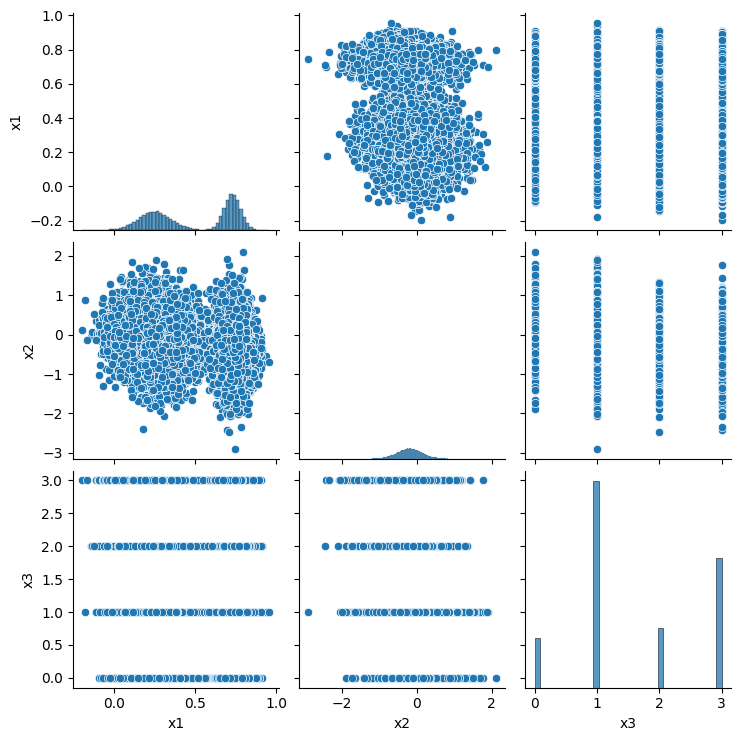

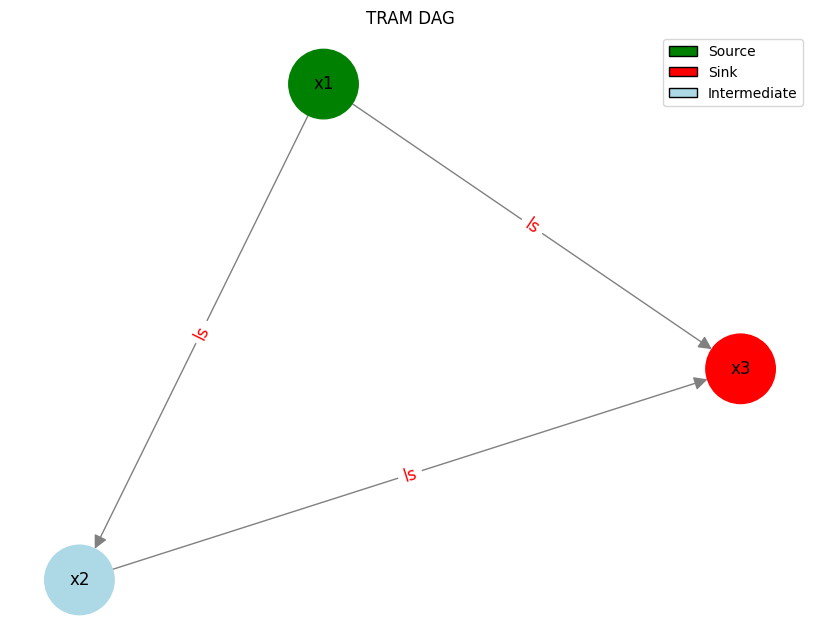

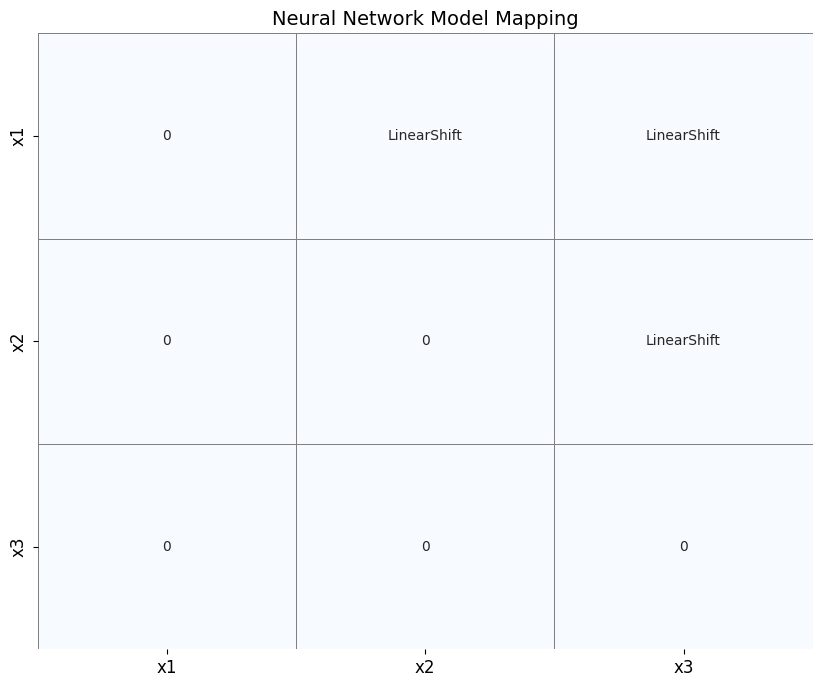

In [2]:
import os
from utils.configuration import *
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split

experiment_name = "dev_API_Reproduce_TramDag_Experiment_6_2_mixed_datatypes"      ## <--- set experiment name
LOG_DIR="/home/bule/TramDag/dev_experiment_logs"  ## <--- set log directory
EXPERIMENT_DIR = os.path.join(LOG_DIR, experiment_name)
CONF_DICT_PATH = os.path.join(EXPERIMENT_DIR, f"configuration.json")

setup_configuration(experiment_name,EXPERIMENT_DIR)

def dgp(n_obs, doX=[None, None, None], f=lambda x: x, seed=None):
    """
    Data-generating process matching the provided R implementation.
    
    Parameters
    ----------
    n_obs : int
        Number of observations to generate.
    doX : list of length 3
        If doX[i] is not None, fixes X_{i+1} to that constant for all draws.
    f : callable
        A function of X2 used in generating X3 (defaults to identity).
    seed : int or None
        If provided, sets the NumPy random seed.
    
    Returns
    -------
    pd.DataFrame
        DataFrame with columns ['x1', 'x2', 'x3'], where x3 is an ordered
        categorical with levels 1 < 2 < 3 < 4.
    """
    if seed is not None:
        np.random.seed(seed)
        print(f"Setting seed: {seed}")

    # --- 1. Sample X1 from a 2-component GMM ---
    if doX[0] is None:
        X1_A = np.random.normal(loc=0.25, scale=0.10, size=n_obs)
        X1_B = np.random.normal(loc=0.73, scale=0.05, size=n_obs)
        mix = np.random.choice([0, 1], size=n_obs)
        x1 = np.where(mix == 0, X1_A, X1_B)
    else:
        x1 = np.full(n_obs, doX[0], dtype=float)

    # --- 2. Sample X2 via shifted-logit inversion (as in R) ---
    if doX[1] is None:
        # draw U2 ~ Uniform(0,1) and map through quantile of logistic
        u2 = np.random.uniform(size=n_obs)
        z2 = np.log(u2 / (1 - u2))  # qlogis
        # replicate: X2 = (z2 - 2 * x1) / 5
        x2 = (z2 - 2 * x1) / 5.0
    else:
        x2 = np.full(n_obs, doX[1], dtype=float)

    # --- 3. Sample X3 as an ordinal via logistic thresholds ---
    if doX[2] is None:
        # latent U3 ~ Logistic(0,1)
        u3 = np.random.logistic(loc=0.0, scale=1.0, size=n_obs)
        # thresholds theta_k = (-2, 0.42, 1.02)
        theta = np.array([-2.0, 0.42, 1.02])
        # compute h[i,k] = theta_k + 0.2 * x1[i] + f(x2[i])
        h = theta + 0.2 * x1.reshape(-1, 1) + f(x2).reshape(-1, 1)
        # assign x3 starting at 0
        x3 = np.zeros(n_obs, dtype=int)
        x3[u3 > h[:, 0]] = 1
        x3[u3 > h[:, 1]] = 2
        x3[u3 > h[:, 2]] = 3
        # convert to ordered categorical
        x3 = pd.Categorical(x3, categories=[0, 1, 2, 3], ordered=True)
    else:
        x3 = pd.Categorical(
            np.full(n_obs, doX[2], dtype=int),
            categories=[0, 1, 2, 3],
            ordered=True
        )
        
    # x3 = x3.astype(float) / 4.0
    x3 = x3.astype(int) 
    return pd.DataFrame({'x1': x1, 'x2': x2, 'x3': x3})

df = dgp(n_obs=100_000, seed=42)
df.info()

sns.pairplot(df)

train_df, temp_df = train_test_split(df, test_size=0.2, random_state=42)
val_df, test_df = train_test_split(temp_df, test_size=0.5, random_state=42)
print(f"Train size: {len(train_df)}, Validation size: {len(val_df)}, Test size: {len(test_df)}")

data_type= {'x1':'continous','x2':'continous','x3':'ordinal_Xn_Yo'} 
write_data_type_to_configuration(data_type, CONF_DICT_PATH)

interactive_adj_matrix(CONF_DICT_PATH,seed=19)
interactive_nn_names_matrix(CONF_DICT_PATH, seed=5)

from utils.tramdag import TramDagConfig , TramDagModel

cfg = TramDagConfig.load(f"/home/bule/TramDag/dev_experiment_logs/{experiment_name}/configuration.json")
cfg.compute_levels(train_df)
device='cpu'

In [3]:
td_model = TramDagModel.from_config(cfg, set_initial_weights=True,verbose=True,debug=True,device=device,initial_data = train_df) 
# 

[DEBUG] TramDagModel using device: cpu

[INFO] Building model for node 'x1' with settings: {'set_initial_weights': True, 'debug': True, 'verbose': True, 'device': 'cpu', 'initial_data':              x1        x2  x3
75220  0.729475 -0.573516   0
48955  0.212327 -0.198221   3
44966  0.219109  0.129154   1
13568  0.777640  0.816980   1
92727  0.357308 -0.411472   3
...         ...       ...  ..
6265   0.700518 -0.365170   0
54886  0.217960 -0.776592   2
76820  0.209427 -0.405457   3
860    0.741015  0.424173   0
15795  0.722792 -0.405650   2

[80000 rows x 3 columns]}
[DEBUG] get_fully_specified_tram_model(): device: cpu
[DEBUG] default_number_thetas for continuous outcomes: 20
[DEBUG] Wrote DataFrame to temporary CSV: temp/initial_data_1761477927.csv
[DEBUG] R script written to: /tmp/tmpeq9_qt_l.R
[DEBUG] R code:
 
library(MASS)
library(tram)
library(readr)

data <- read_csv("temp/initial_data_1761477927.csv")
model <- Colr(`x1` ~ 1, data=data, order=19)
cat(model$theta, sep="\n")

[DEB


# looking at x3:

thetas from r model with the code below:

```
library(MASS)
library(tram)
library(readr)
data <- read_csv("{data_path}")
data${target} <- factor(data${target}, ordered=TRUE)
model <- polr(`{target}` ~ 1, data=data, method="logistic")
cat(model$zeta, sep="\\n")
""")
```

r estimated thetas and the inverse oh them to set to the model..


```
[DEBUG] R-estimated thetas for node 'x3': [-2.054361   0.3095475  0.897935 ]
[DEBUG] Expected number of thetas: 3
[DEBUG] Last linear layer shape: torch.Size([3, 1])
[DEBUG] Inverse transforming thetas for ordinal outcome...
[DEBUG] Transformed theta_tilde: [[-2.054361   0.8603164 -0.5303696]]
[DEBUG] Transformed theta_tilde shape: torch.Size([1, 3])
```


## showing that weight initialization give the theta_tilde as weights for a forward pass 

In [4]:
from utils.tramdag import TramDagDataset
from utils.loss_ordinal import ontram_nll
import torch
td_dataset = TramDagDataset.from_dataframe( train_df, cfg,device=device,batch_size=1)
loader3=td_dataset.loaders['x3']
model3=td_model.models['x3']

for item in loader3:
    (int_input, shift_list), y = item

    print(int_input)
    print(shift_list)
    print(y)
    
    y_pred = model3(int_input=int_input, shift_input=shift_list)
    print(y_pred)
    
    
    loss = ontram_nll(y_pred, y)
    print(loss)

    break

tensor([[1.]])
[tensor([[0.2317]]), tensor([[0.3587]])]
tensor([[0., 1., 0., 0.]])
{'int_out': tensor([[-2.0544,  0.8603, -0.5304]], grad_fn=<MmBackward0>), 'shift_out': [tensor([[0.1326]], grad_fn=<MmBackward0>), tensor([[-0.2023]], grad_fn=<MmBackward0>)]}
tensor(0.7489, grad_fn=<NegBackward0>)


```
{'int_out': tensor([[[-2.0544,  0.8603, -0.5304]]], grad_fn=<UnsafeViewBackward0>), 'shift_out': [tensor([[[-0.0605]]], grad_fn=<UnsafeViewBackward0>), tensor([[[0.2553]]], grad_fn=<UnsafeViewBackward0>)]}
```
int out is exactly the thetas that are initialized

# transforming thetas back and forth

In [3]:
from utils.loss_ordinal import transform_intercepts_ordinal,inverse_transform_intercepts_ordinal

In [6]:
thetas_tilde=torch.Tensor([[-2.0544,  0.8603, -0.5304]])
thetas_tilde.shape

torch.Size([1, 3])

In [7]:
theta=transform_intercepts_ordinal(thetas_tilde)
theta

tensor([[   -inf, -2.0544,  0.3095,  0.8978,     inf]])

In [8]:
theta_tilde_2=inverse_transform_intercepts_ordinal(theta)
theta_tilde_2

tensor([[-2.0544,  0.8603, -0.5304]])

In [9]:
theta_2=transform_intercepts_ordinal(theta_tilde_2)
theta_2

tensor([[   -inf, -2.0544,  0.3095,  0.8978,     inf]])

In [10]:
#TODO fix inifinty handling in epoch saving for ordinal thetas